Assignment 2: QBIO 481 - Tomas Manea

Question 1: General knowledge(q) A. Describe the three main structural properties that stabilizes the DNA double helix. Briefly describe the relevant physical basis for each of those properties. 3pts

(a) The DNA double helix is stabilized by van der waal interactions (base stacking interactions), hydrogen bonds (between base pairs), and electrostatic interactions (between the phosphate backbone and cations).

(q) B. Explain the difference between intra-base pair parameters and inter-base pair parameters. Choose 3 DNA shape parameters to describe the structural differences between B-DNA and A-DNA. 3pts

(a) Intra-base pair parameters refers to the geometrical relationships between two bases within a given base pair. These parameters measure how individual bases interact with each other, respectively. This includes factors like shear[ing] (displacement in the plane of the base pairs), stretch[ing] (distance between bases), and stagger[ing] (offset along the helix axis). Whereas, Inter-base pair parameters refers to the relationships between two consecutive base pairs in the DNA sequence. These parameters describe how the stacked base pairs interact with one another and include twist[ing] (the rotation angle between consecutive base pairs around the central axis of the DNA helix), roll[ing] (the tilting of base pairs relative to each other affecting DNA bends/kinks), and rise[ing] (the distance between successive base pairs along the helix axis determining length and compactness of DNA helix). 

Structural differences between B-DNA and A-DNA using 3 DNA shape parameters:
Helical twist: B-DNA has a helical twist of about 36° per base pair, while A-DNA has a larger twist of about 32°, making A-DNA more tightly wound.

Rise: B-DNA has a rise of about 3.4 Å per base pair, whereas A-DNA has a smaller rise of about 2.3 Å, meaning A-DNA is more compressed along its axis.

Helix diameter: B-DNA has a diameter of about 20 Å, whereas A-DNA has a wider diameter of around 23 Å.

(q) C. Briefly explain the importance of the Poisson-Boltzmann equation. How can we use it to study protein DNA interactions? 4pts

(a) The importance of Poisson Boltzmann equation is that it describes how electrostatic potential is disperesed in a susystem where charged particles interact—in an ionic solution. This is important to study as it models the electrostatic forces between the negatively-charged DNA backbone and the cations from the surrounding area. Through solving Poisson Boltzmann, one can infer how proteins will bind to DNA, determine strength, shape, and specificity: allowing researchers to understand how different binding changes with different ionic conditions.


Question 2: DNA Structure
This question will use the two PDB files provided with this assignment, red.pdb and blue.pdb. One of these contains the structure of an A-DNA helix, and the other of a B-DNA helix. You will identify which is which.

A. Using PyMol, open both structures within the same session. Play around with the various visualization options to get familiar with them. Now, use the align command (https://pymolwiki.org/index.php/Align) to superimpose these twostructures, then use the translate command (https://pymolwiki.org/index.php/Translate) to shift one of them so that they are in the same orientation, but not overlapping. Produce a visualization similar to the one below and include it in your report. Describe three structural differences you observe between these two structures. 3pts

B. Use 3DNA web server to calculate DNA shape parameters and quantify the differences between the structures for the two helices.
Visit http://web.x3dna.org/ and upload the red.pdb and blue.pdb files individually. You’ll be shown a page with some visualizations and a lot of
information. Scroll down to the “Nucleic acid structural parameter summary file” section and download the parameter summary file for both structures. Within that file, find the table labeled as “Local base-pair helical parameters”. Take the data in that table and plot x-displacement vs inclination as a scatter plot for both structures on the same graph and include this plot in your report. 10pts
● Color the red.pdb points red and blue.pdb points blue 
● Label the horizontal and vertical axis appropriately
● Include, for each set of points, the median point, and plot it as an easily identifiable point and label it.

C. Based on the two visualizations you’ve produced in part 2.A and 2.B, which helix is A-DNA and which is B-DNA? Justify your response. 2pts

D. Using the protein data bank or another website, such as (http://ndbserver.rutgers.edu/), find an example of a Z-DNA helix. Reproduce the same plot as you made in part 2.B, but this time add the shape parameters of the Z-DNA helix colored in green. Also include a visualization of this helix using PyMol in your report. 5pts

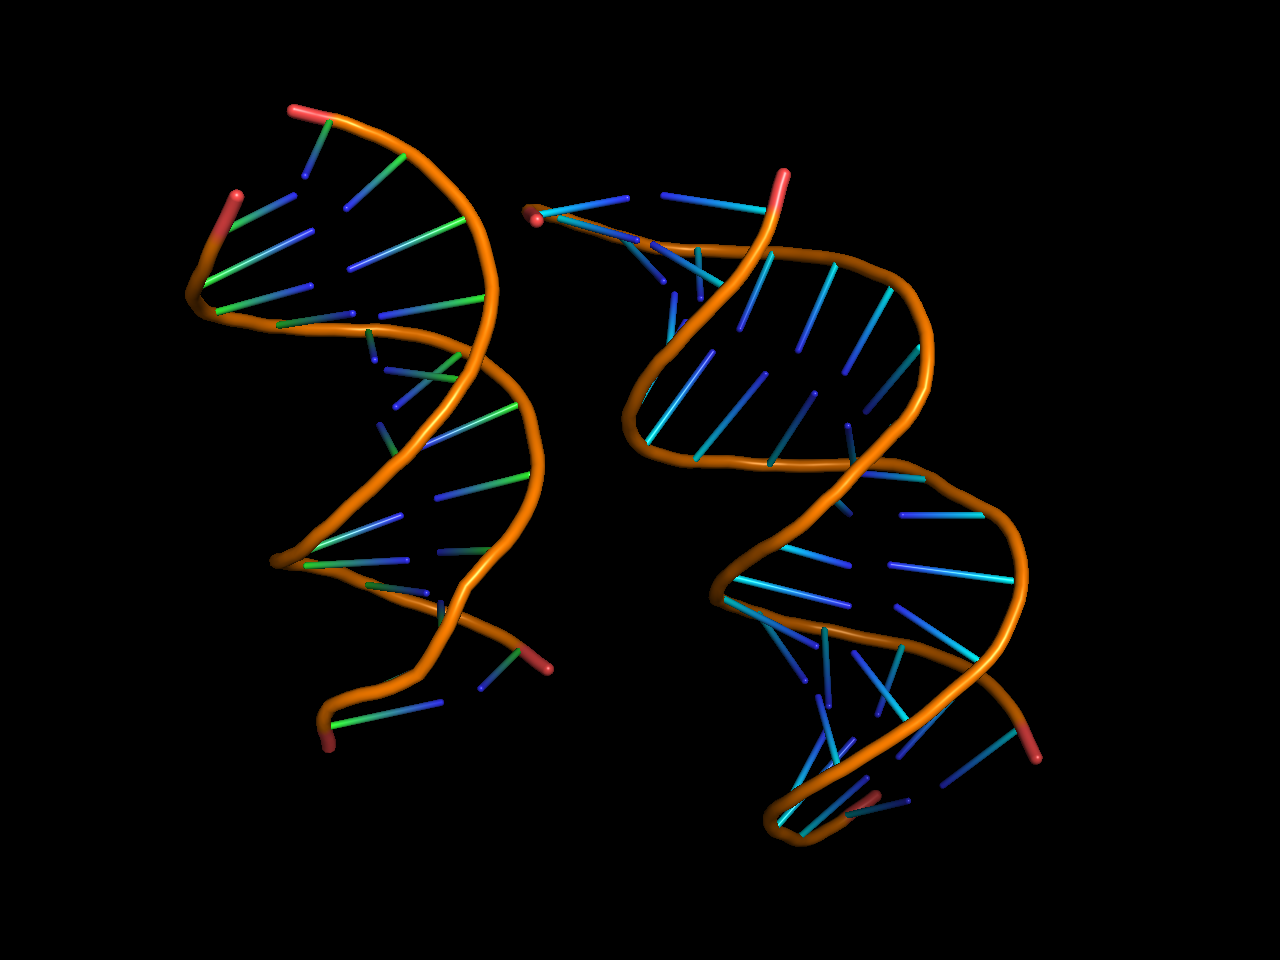

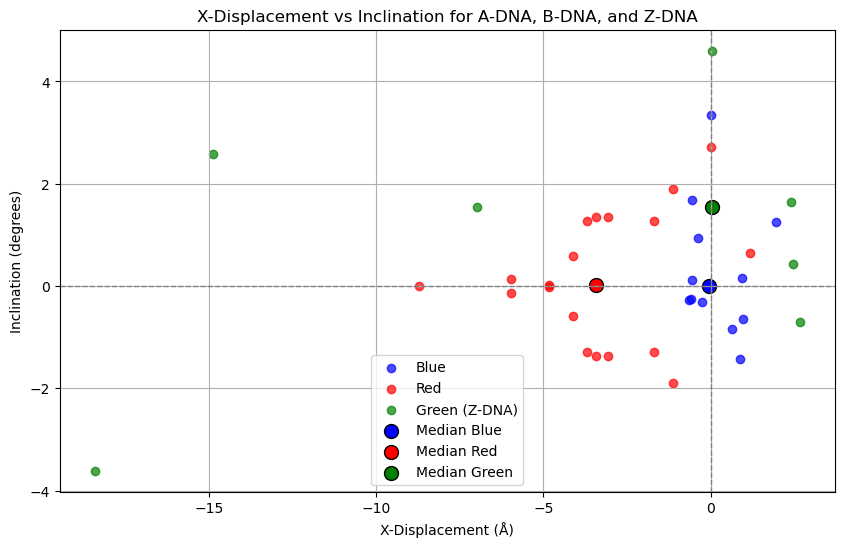

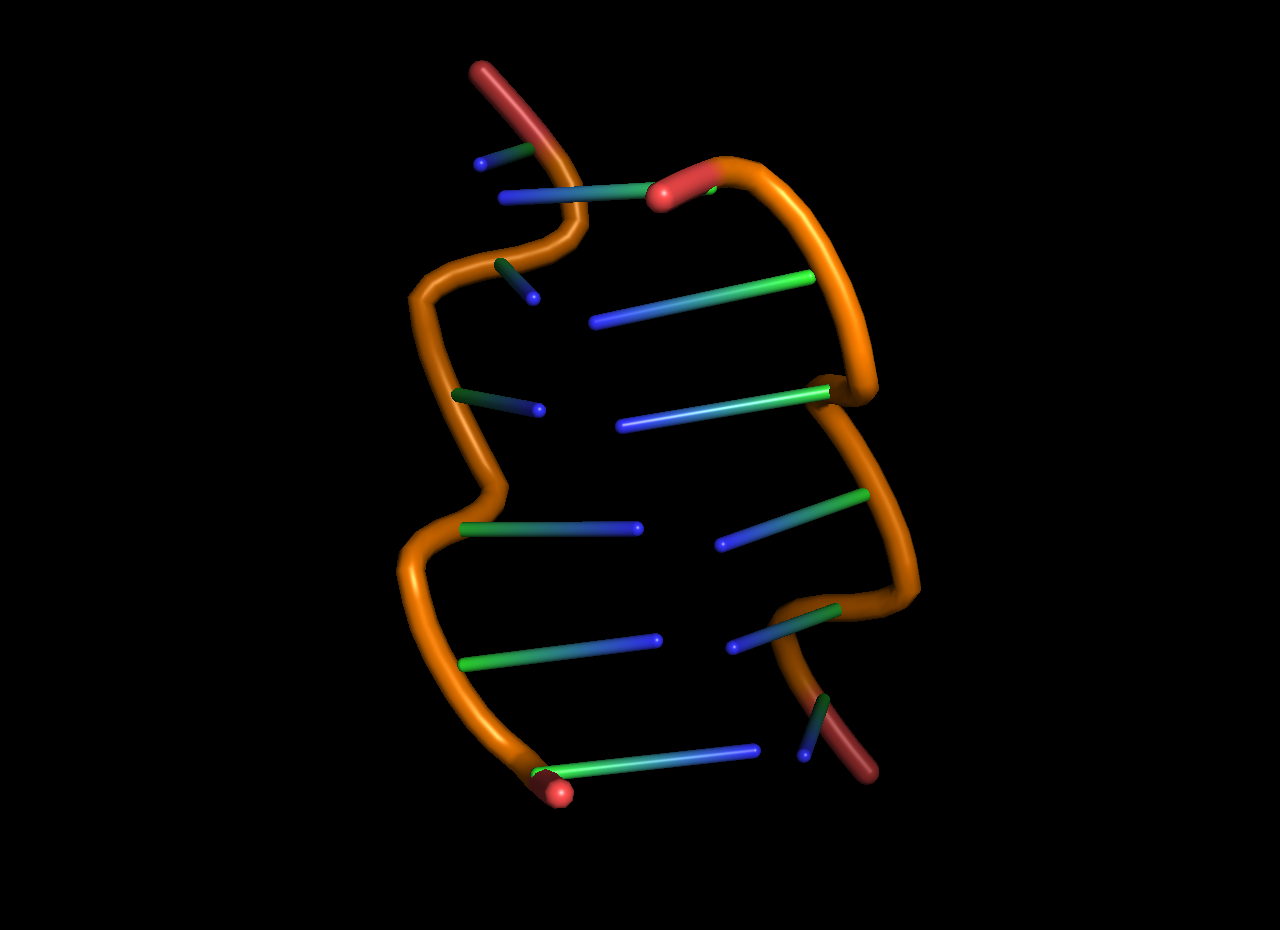

In [6]:
# Part A
from IPython.display import Image, display
import matplotlib.pyplot as plt
import numpy as np

# Display the superimposed structures image
img_path = '/Users/tomasmanea/Desktop/Fall2024/QBIO481/A2/superimposed_structures.png'
display(Image(filename=img_path))


# Part B - Function to extract X-Displacement and Inclination
def extract_parameters(file_path):
    x_displacements = []
    inclinations = []
    
    with open(file_path, 'r') as file:
        lines = file.readlines()
        start_reading = False
        
        for line in lines:
            if "Local base-pair helical parameters" in line:
                start_reading = True
                continue
            
            if start_reading and line.strip() == "":
                break
            
            if start_reading:
                parts = line.split()
                if len(parts) >= 4:  # Ensure we have enough parts
                    try:
                        x_displacements.append(float(parts[2]))  # Assuming x-displacement is the third column
                        inclinations.append(float(parts[3]))     # Assuming inclination is the fourth column
                    except ValueError:
                        continue  # Skip lines that cannot be converted to float

    return x_displacements, inclinations

# Updated plot function to add Z-DNA data
def plot_x_disp_vs_inclination(blue_file, red_file, z_file):
    blue_x, blue_y = extract_parameters(blue_file)
    red_x, red_y = extract_parameters(red_file)
    z_x, z_y = extract_parameters(z_file)

    plt.figure(figsize=(10, 6))
    plt.scatter(blue_x, blue_y, color='blue', label='Blue', alpha=0.7)
    plt.scatter(red_x, red_y, color='red', label='Red', alpha=0.7)
    plt.scatter(z_x, z_y, color='green', label='Green (Z-DNA)', alpha=0.7)

    # Calculate and plot median points
    blue_median = (np.median(blue_x), np.median(blue_y))
    red_median = (np.median(red_x), np.median(red_y))
    z_median = (np.median(z_x), np.median(z_y))

    plt.scatter(*blue_median, color='blue', edgecolor='black', s=100, label='Median Blue')
    plt.scatter(*red_median, color='red', edgecolor='black', s=100, label='Median Red')
    plt.scatter(*z_median, color='green', edgecolor='black', s=100, label='Median Green')

    plt.xlabel('X-Displacement (Å)')
    plt.ylabel('Inclination (degrees)')
    plt.title('X-Displacement vs Inclination for A-DNA, B-DNA, and Z-DNA')
    plt.axhline(0, color='grey', lw=1, ls='--')  # Optional: add horizontal line at y=0
    plt.axvline(0, color='grey', lw=1, ls='--')  # Optional: add vertical line at x=0
    plt.legend()
    plt.grid()
    plt.savefig('/Users/tomasmanea/Desktop/Fall2024/QBIO481/A2/x_disp_vs_inclination_with_z_dna.png')
    plt.show()

# Path to the parameter summary files for A-DNA, B-DNA, and Z-DNA
blue_file = '/Users/tomasmanea/Desktop/Fall2024/QBIO481/A2/blue_summary.txt'
red_file = '/Users/tomasmanea/Desktop/Fall2024/QBIO481/A2/red_summary.txt'
z_file = '/Users/tomasmanea/Desktop/Fall2024/QBIO481/A2/z_dna_summary.txt'

# Call the function to plot all three
plot_x_disp_vs_inclination(blue_file, red_file, z_file)


# Part D - Display the Z-DNA structure image from PyMol
img_path2 = '/Users/tomasmanea/Desktop/Fall2024/QBIO481/A2/z_dna_structure.png'
display(Image(filename=img_path2))


2.C
(q) Based on the two visualizations you’ve produced in part 2.A and 2.B, which helix is A-DNA and which is B-DNA? Justify your response. 2pts

(a) A-DNA is the blue and B-DNA is the red. This is surmised because of A-DNA's tendency to have higher x-displacement and more inclination relative to B-DNA: A-DNA is more compact and wider, typically exhibiting larger tilt in base pairs, therefore, more "kinks" or "tilts." Furthermore, B-DNA has smaller x-displacement and less inlcination as attributed to its base pairs being closer and nearly perpendicular to the helical axis.


Question 3: Poisson-Boltzmann ElectrostaticsWe will use the PyMol plugin known as “APBS Electrostatics” to perform a Poisson-Boltzmann calculation on a protein structure. This allow us to visualize the electrostatic potential of protein. I have provided you with the structure of a homeodomain (a protein domain that binds DNA) for this purpose.

A. Open the file 1jgg_A.pdb (provided) in PyMol. We are going to perform 3 separate Poisson-Boltzmann calculations on this protein structure using different settings. Please do these separately (in different PyMol sessions) in order to avoid making mistakes. For all three runs, you must include visualizations of the resulting electrostatic potential surface in your report. 10pts

1. With PyMol open, at the top of the screen you will see a “Plugin” menu. Open it and select “APBS Electrostatics” and a new window will open.

2. For the first run, we will leave everything as default. Click “Run”. You will get a warning stating “pdb2pqr emitted warnings, do you want to continue?” click “yes”. A surface will be added to your PyMol session that is colored from red to blue. This surface represents the solvent-excluded surface of the protein with the value of the electrostatic potential at the surface represented by the color bar below (blue is positive, red is negative).

2. Perform a second calculation, but this time go to “APBS Template” at the top of the ABPS Electrostatics pop-up window. Here we can adjust the parameters used in the calculation. Near the bottom, you will see the following two lines:
          ion charge +1 conc 0.15 radius 2.0
          ion charge -1 conc 0.15 radius 1.8These lines specify the charge, concentration and ionic radius of two salt ions that are, by default, included in our calculation. Change the value of “conc” from 0.15 to 0.0 in both lines – this effectively removes any ionic charge from the calculation. Perform a second calculation as before.

3. Perform a third calculation, but this time set the salt concentrations to 0.45, and change “lpbe” to “npbe” (don’t worry about what this means). This triples the salt concentration relative to the first calculation.

4. Now, include visualizations for all three runs in your report. Include two different camera angles for each run and try to make the angles consistent with each other between runs. Be sure to label each run correctly!

B. Based on your observations, how does changing the salt concentration affect the electrostatic potential? How might this be relevant to protein DNA binding? Do you expect protein-DNA binding to be stronger under high or low salt concentrations? 5pts

C. Based on the electrostatic potential you have observed in run #1 (under near- physiological conditions), and the known chemical and electrostatic properties of DNA, identify the region of this protein domain that is most likely to bind DNA. You can simply circle a region from the visualizations you produced in run #1 (add them as new figures in response to this question). 5pts

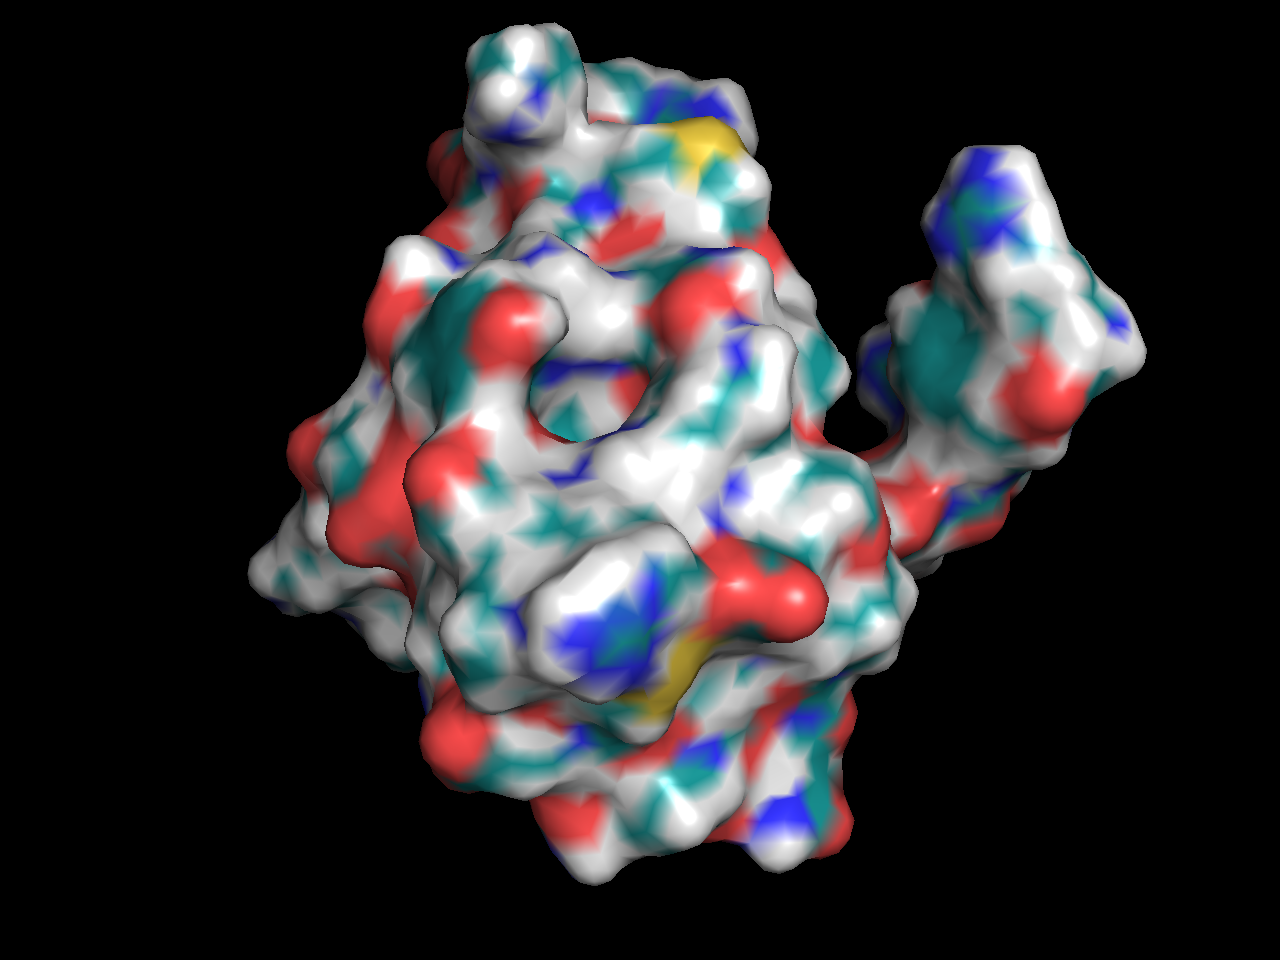

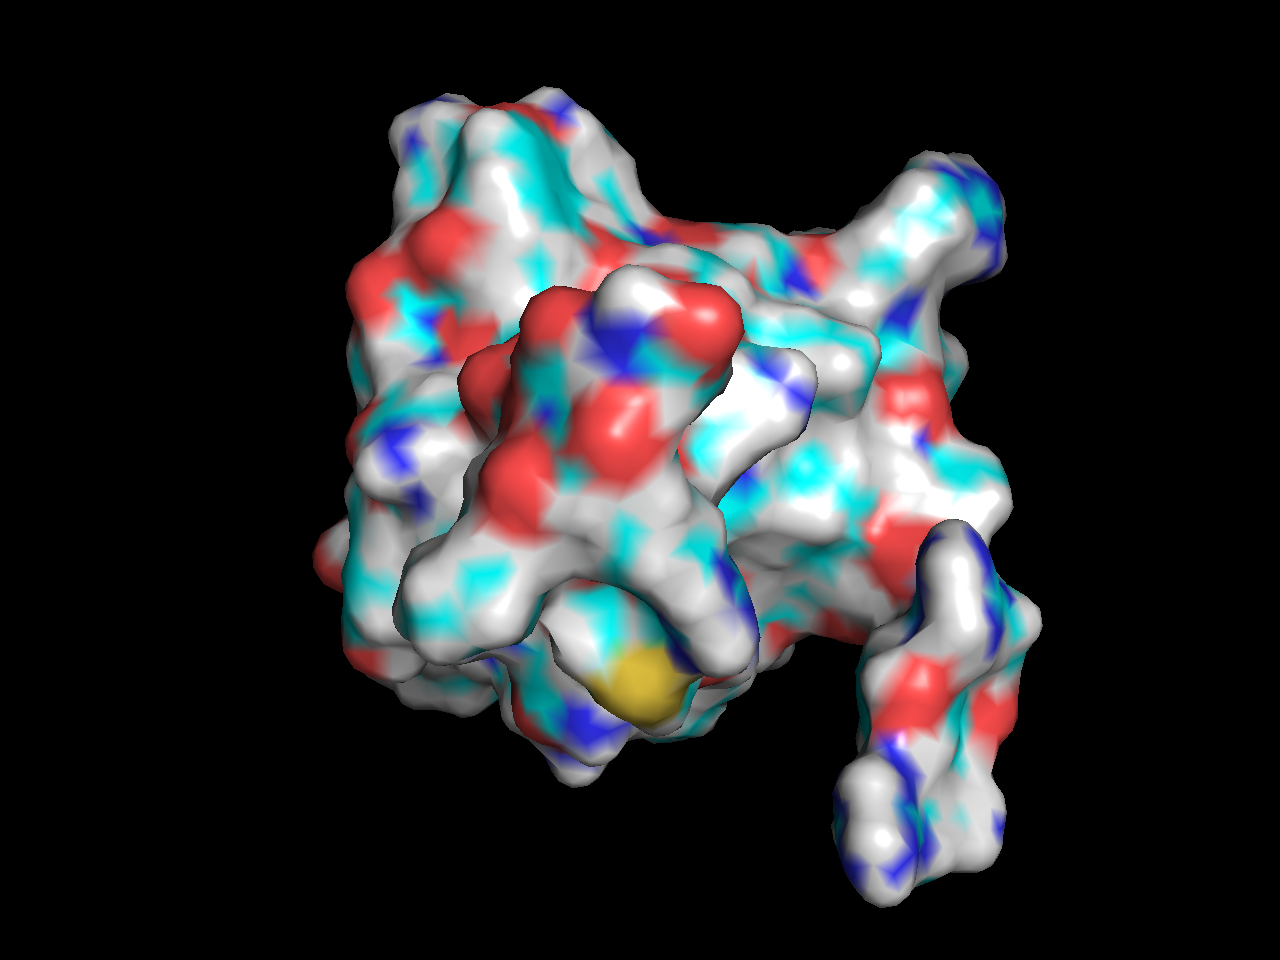

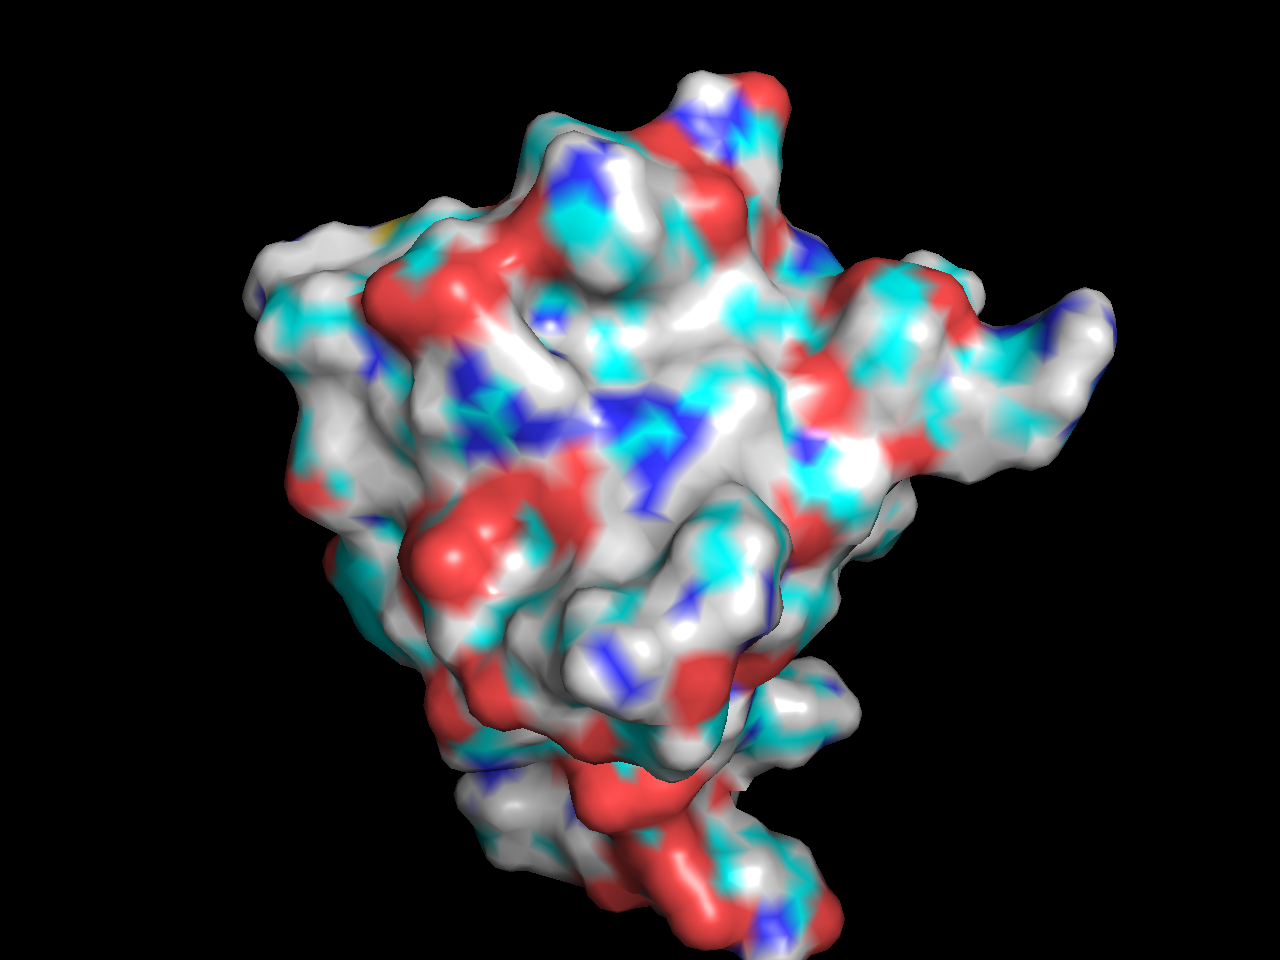

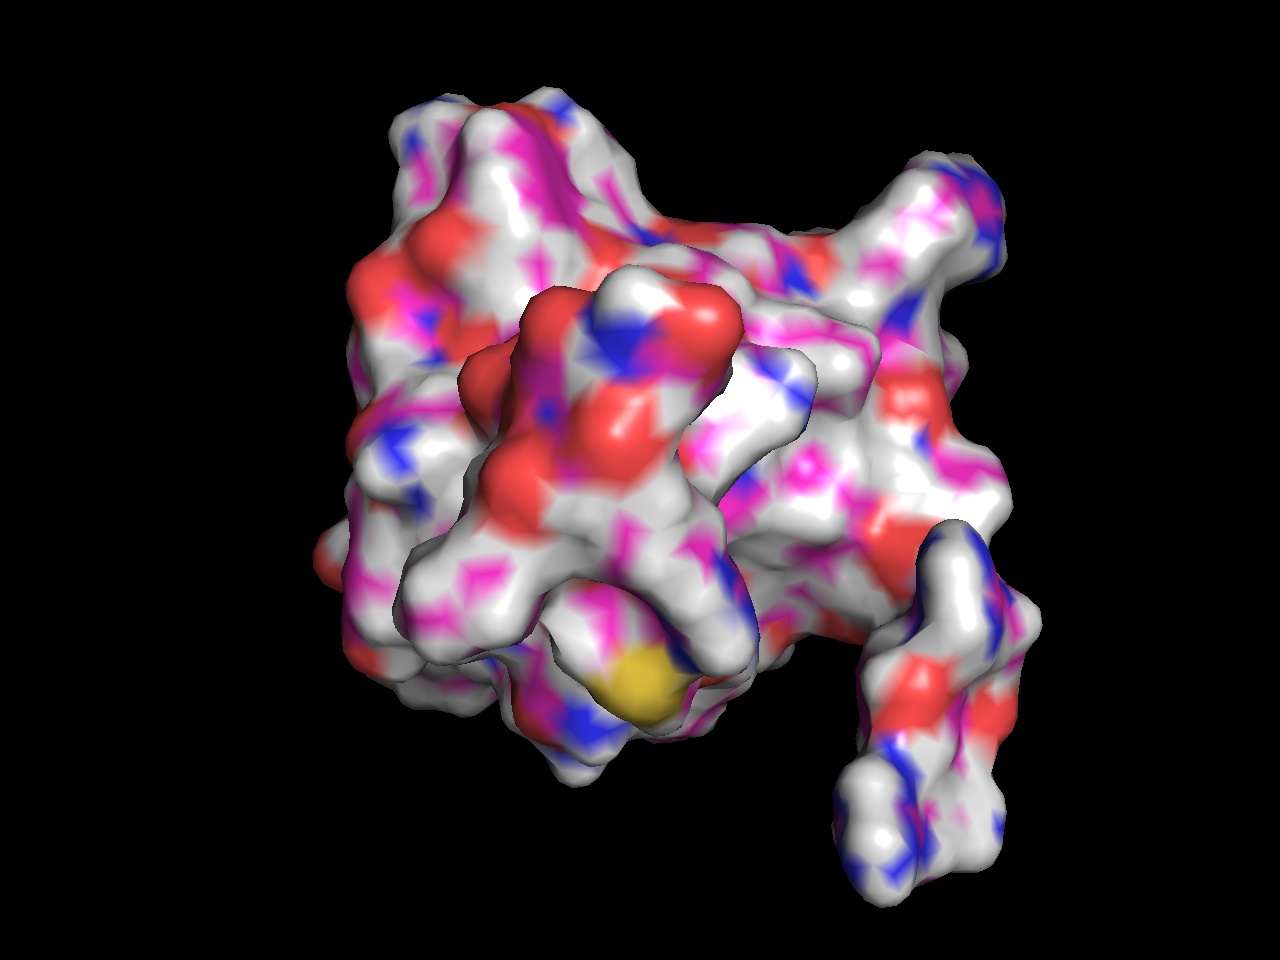

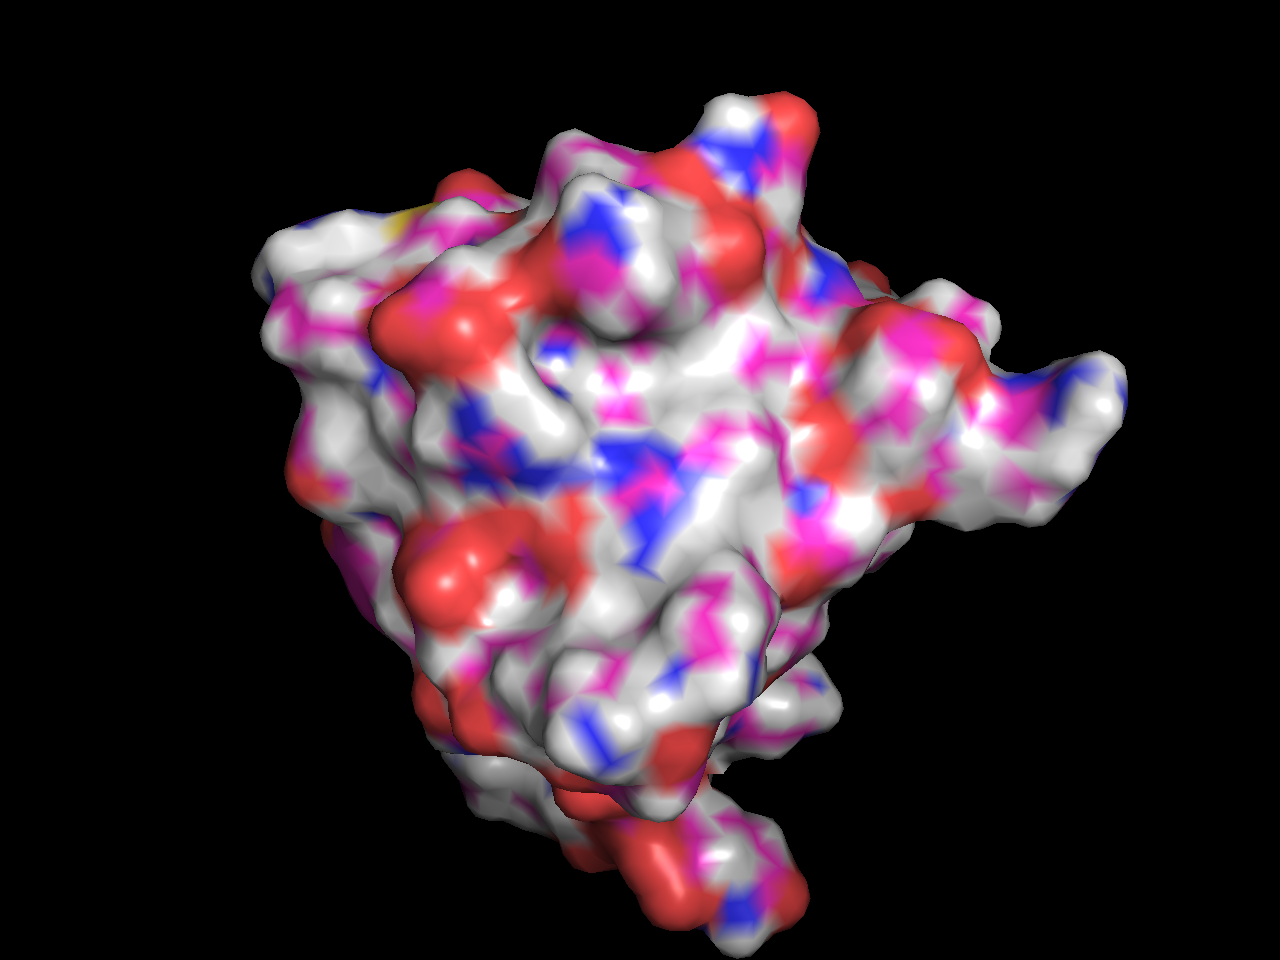

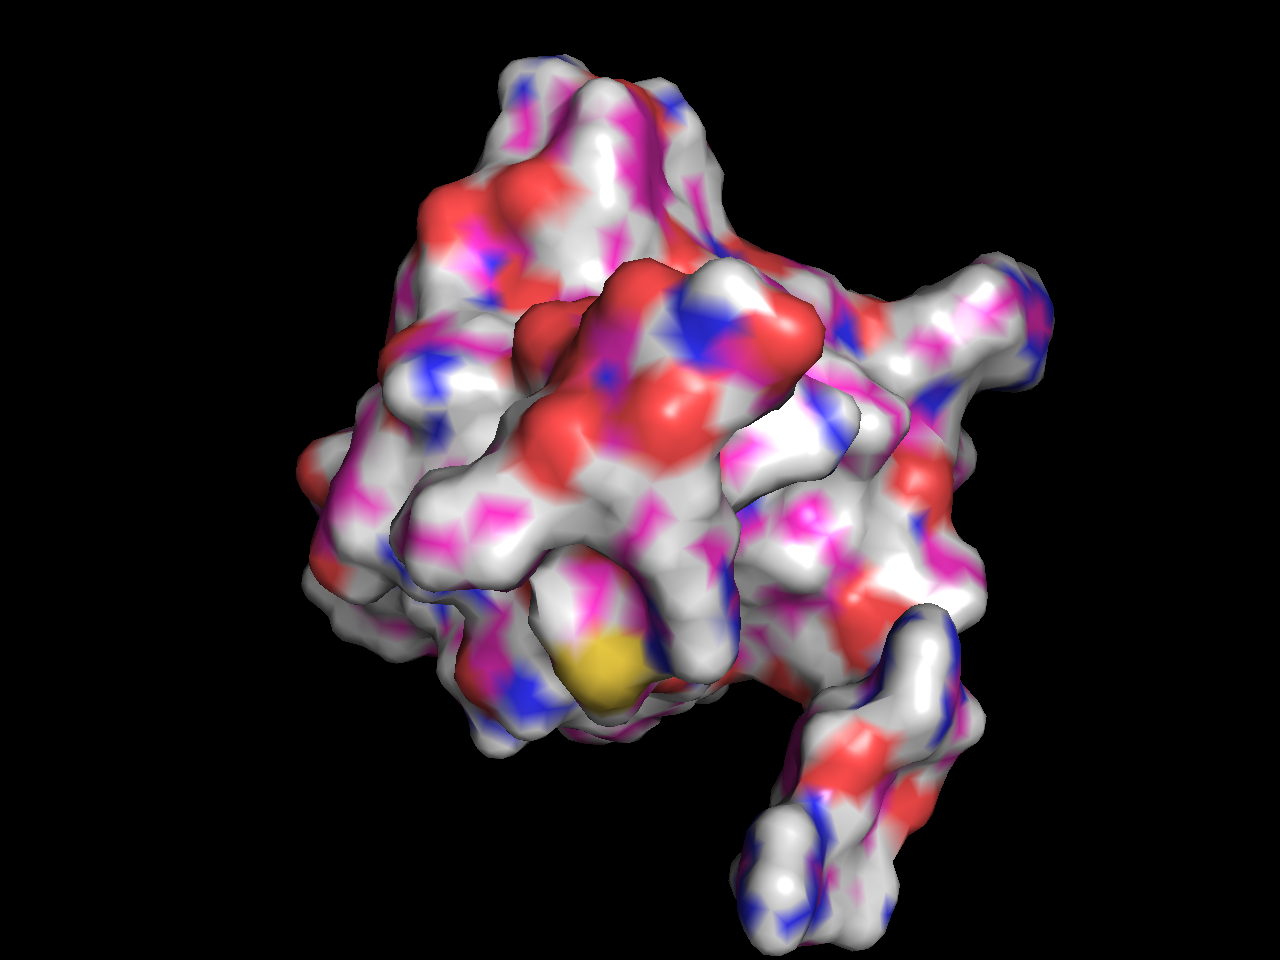

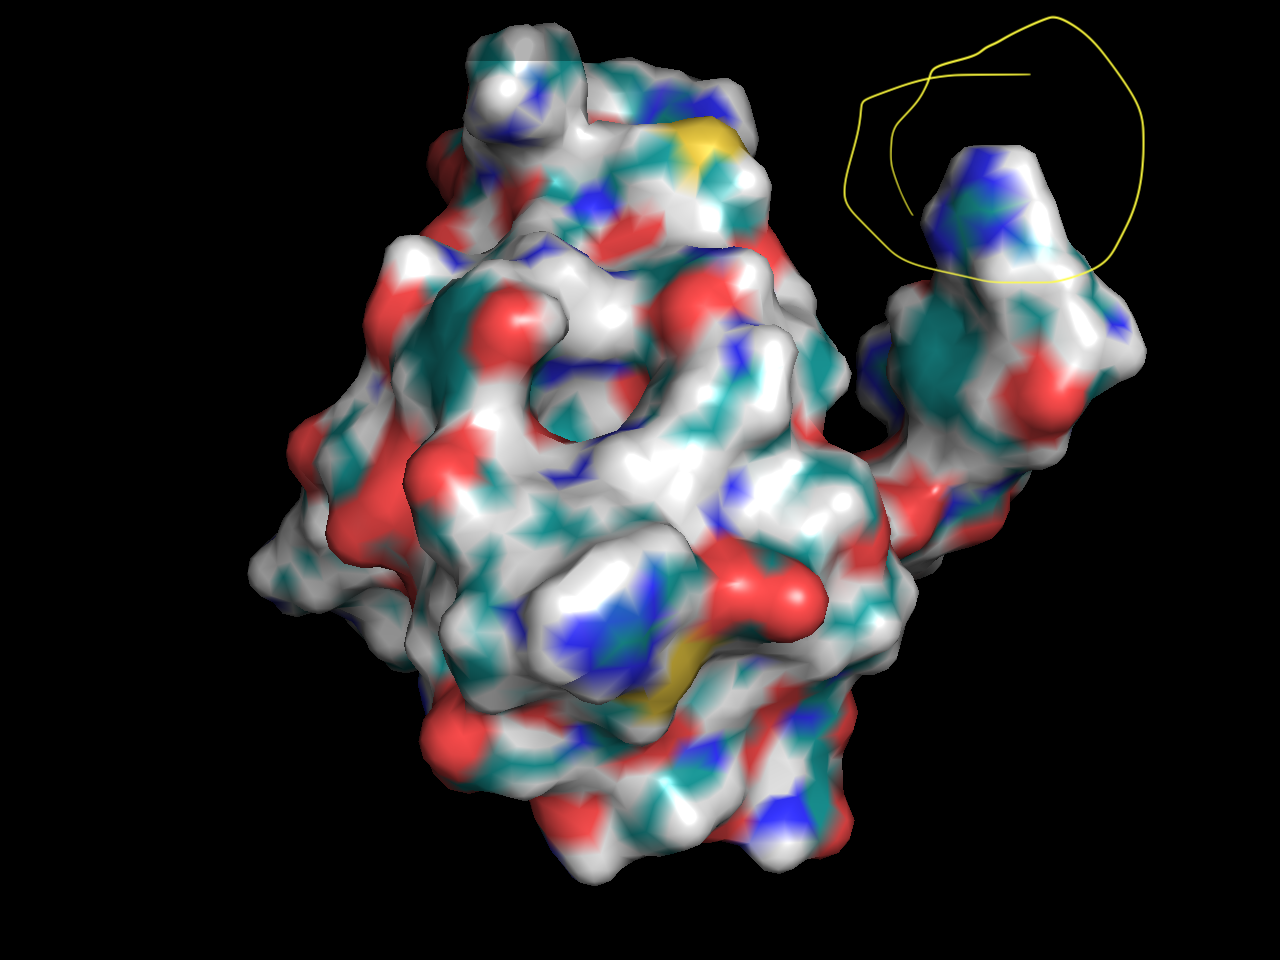

In [7]:
# Question 3, Part A: APBS ElectroStatics
from IPython.display import Image, display

# 1 - Default APBS Electrostatics of "1jgg"
img_path = '/Users/tomasmanea/Desktop/Fall2024/QBIO481/A2/1jgg_electrostatics.png'
display(Image(filename=img_path))

img_path_a2 = '/Users/tomasmanea/Desktop/Fall2024/QBIO481/A2/1jgg_electrostatics_a2.png'
display(Image(filename=img_path_a2))

# 2 - Without Ionic Charge APBS Electrostatics of "1jgg"
img_path2 = '/Users/tomasmanea/Desktop/Fall2024/QBIO481/A2/1jgg_electrostatics2.png'
display(Image(filename=img_path2))

img_path2_a2 = '/Users/tomasmanea/Desktop/Fall2024/QBIO481/A2/1jgg_electrostatics2_a2.png'
display(Image(filename=img_path2_a2))

# 3 - Ionic Charge APBS Electrostatics of "1jgg"
img_path3 = '/Users/tomasmanea/Desktop/Fall2024/QBIO481/A2/1jgg_electrostatics3.png'
display(Image(filename=img_path3))

img_path3_a2 = '/Users/tomasmanea/Desktop/Fall2024/QBIO481/A2/1jgg_electrostatics3_a2.png'
display(Image(filename=img_path3_a2))

# Part C - Circle region
# 1 - Circled Most Positive Region of "1jgg"
img_path_c = '/Users/tomasmanea/Desktop/Fall2024/QBIO481/A2/1jgg_electrostatics_copy.png'
display(Image(filename=img_path_c))



Question 3
(q) B. Based on your observations, how does changing the salt concentration affect the electrostatic potential? How might this be relevant to protein DNA binding? Do you expect protein-DNA binding to be stronger under high or low salt concentrations? 5pts

(a) Salt concentration at 1) large concentrations, results in neutralized electrostatic potential and more diffuse because of ionic screening; 2) physiological concentrations, results in a balanced distribution of red and blue (negatively and positively charged, respectively) electrostatic areas; 3) low concentrations, results in stronger electrostatic forces and more spread out.

This is relevant to DNA due to the negatively charged phosphate backbone (which gives DNA its negative charge), where many postively-charged regions in porteins can facillitate electrostatic reactions between DNA and positive-charged protein region(s). DNA is also known to be screened out in highly ionic solutions, known as the ionic screening effect, whereas in low salt concentrations there are less ionic interactions, allowing for conversely stronger and tighter binding between protein and DNA.

(q) C. Based on the electrostatic potential you have observed in run #1 (under near- physiological conditions), and the known chemical and electrostatic properties of DNA, identify the region of this protein domain that is most likely to bind DNA. You can simply circle a region from the visualizations you produced in run #1 (add them as new figures in response to this question). 5pts

(a) Look at aforementioned code: "1jgg_electrostatics_copy"

Question 4: Force Field Energy Minimization using Python
In this question we will be using python and a very simple force-field to find the conformation of a molecule structure which minimizes a potential energy function.
Two python scripts, energy_minimization.py and Atoms.py are provided. You will be working on the first one, but do not alter or modify the second script in
any way. There's no need to review it. If you're new to Python, please take some time to go through the following tutorial (or explore one of the many available online):https://www.programiz.com/python-programming/tutorial
Before proceeding, please install the packages “numpy” and “scipy” if they are not already installed:
conda install numpy
conda install scipy
(You can use pip install if you do not have a conda environment, but condais recommended)

A. Open the script energy_minimization.py in a text editor. I recommend the program “sublime text” (google it).
Now, have a look over the code and try to grasp a little of what it is doing.
Your task is simply to fill in a few lines of code to produce some output and then have a look at the results. The comments in the code will walk you through what you need to do, beginning at STEP 1.

You need to:● Calculate the total potential energy of the initial configuration of the atoms (using provided functions) and include this value in your report. 3pts
● Calculate the total potential energy of the final configuration, after energy minimization, and include this value in your report. 3pts
● Visualize the initial and final conformations of the molecule (represented by the “atoms” object) using PyMol and include the visualization in your report. 3pts
B. You may have guessed by now that this molecule is benzene. However, aninspection of the final conformation will reveal that the carbon ring is not planar. What potential energy calculation is missing in our force field? 3pts

C. Fill in the calculation for the mysterious potential energy functions and experiment with different angle constants which, when added to the total energy, will produce a planar molecule based on computed torsion angles. Include a visualization of your final minimized molecule AND the code for your torsion potential in your report. HINT: (https://en.wikipedia.org/wiki/Dihedral_angle) 3pts

Initial Total Potential Energy: -1.0908818620194192
Final Total Potential Energy: -1.0908818620194192


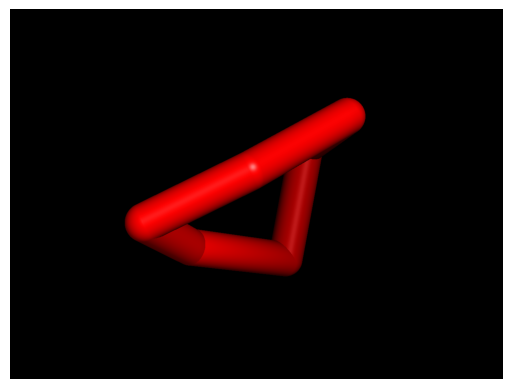

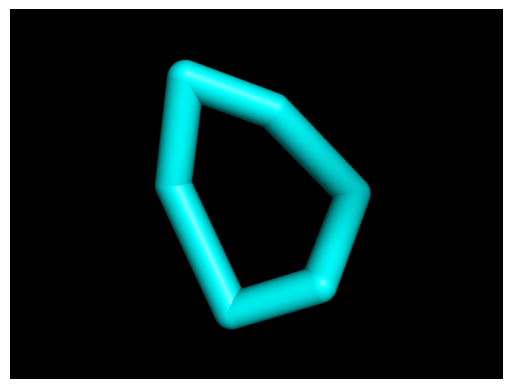

In [55]:
# Import necessary functions from the scripts
from energy_minimization import V_total, minimize_V
from Atoms import atoms  # Assuming atoms is defined in Atoms.py

# STEP 1: Calculate and print the total energy of the initial configuration
initial_energy = V_total(atoms)
print(f"Initial Total Potential Energy: {initial_energy}")

# Save initial conformation to a PDB file for visualization in PyMOL
atoms.save_pdb("initial.pdb")

# STEP 2: Minimize the potential energy of the molecule
minimized_atoms = minimize_V(atoms)

# STEP 3: Calculate and print the total energy of the final minimized configuration
final_energy = V_total(minimized_atoms)
print(f"Final Total Potential Energy: {final_energy}")

# Save final conformation to a PDB file for visualization in PyMOL
minimized_atoms.save_pdb("final.pdb")

def V_torsion(atoms):
    """This function computes the torsion (dihedral) angle energy contribution."""
    V_t = 0  # Total torsion energy
    N = len(atoms)

    for i in range(N):
        j = (i + 1) % N
        k = (i + 2) % N
        l = (i + 3) % N

        # Vectors for bond angles
        vec_ij = atoms.coords[j] - atoms.coords[i]
        vec_jk = atoms.coords[k] - atoms.coords[j]
        vec_kl = atoms.coords[l] - atoms.coords[k]

        # Cross products to get the planes
        normal1 = np.cross(vec_ij, vec_jk)
        normal2 = np.cross(vec_jk, vec_kl)

        # Normalize the cross products (normals)
        normal1 /= np.linalg.norm(normal1) if np.linalg.norm(normal1) != 0 else 1
        normal2 /= np.linalg.norm(normal2) if np.linalg.norm(normal2) != 0 else 1

        # Compute the torsion angle (dihedral angle) between the planes
        cos_theta = np.dot(normal1, normal2)
        theta = np.arccos(np.clip(cos_theta, -1.0, 1.0))

        # Apply the torsional potential energy formula (PHI0 can be adjusted)
        PHI0 = 0.0  # Reference angle for the planar configuration (you can experiment with this)
        V_t += (theta - PHI0) ** 2  # Torsional potential energy

    return V_t

# Modify the existing V_total function to include V_torsion
def V_total_with_torsion(atoms):
    V_total = V_bonds(atoms)  # Compute bond energies
    V_total += V_lennard_jones(atoms)  # Add Lennard-Jones energy
    V_total += V_torsion(atoms)  # Add the torsional energy term
    return V_total

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('comparison.png')

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

# Load the image
img = mpimg.imread('comparison2.png')

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()


Question 5: Protein-DNA Recognition
In this question we will examine several protein-DNA interaction mechanisms.
A. Access the Proteopedia pages
(a) http://www.proteopedia.org/w/Hox-DNA_Recognition and
(b) http://www.proteopedia.org/w/P53-DNA_Recognition. Briefly explain for (a) Hox proteins and (b) p53 which structural features of the respective DNA binding sites are important for achieving binding specificity. 5pts.

B. Briefly explain the physical mechanisms relevant for (a) base readout and (b)shape readout of DNA sequence by Hox proteins and p53. 5pts

(q) Briefly explain for (a) Hox proteins and (b) p53 which structural features of the respective DNA binding sites are important for achieving binding specificity. 5pts. 

(a) For Hox proteins, there are four specific structural features—homeodomain architecture, major/minor groove base/shape readout, and cofactor interactions—that all account for how binding specificity works. More specifically, the homeodomain has a amino-acid helix-turn-helix motif, where the third helix is the recognitiion helix, allowing for specific hydrogen bonds at the sidechains, accomplishing binding specificity. Furthermore, there remains major/minor groove base/shape readout, which respectively covers base-based and shape-based readout in Hox proteins. Similarly, there are cofactors such as Pbx and Exd that contribute to DNA binding specificity, allowing more Hox proteins to attach to a given DNA site.

For p53 proteins, there are four principal structural features that contribute to p53's binding specificity: 1) Core DNA Binding Domain, 2)  Major groove base readout, 3) DNA shape and flexibility, 4) Cooperative Binding. To expand on the DNA binding specificity of p53, its core domain consists of a beta-sandwich scaffold and loops that are stabilized by a zinc ion. This is where DNA interacts, recognizing specific sequences known as p53 response elements (Wang et al., 2010). Secondly, much like Hox proteins, p53 binds to the major groove of DNA through specific hydrogen bonds with DNA bases—where arginine residues help discriminate between different DNA sequences. Thirdly, p53 response elements exihibit sequence-dependent DNA flexibility, where these curvatures allow for tighter bonds in particular regions, highlighting shape readout as minor groove width contributes to recognition of binding sites.  

(q) Briefly explain the physical mechanisms relevant for 1) base readout and 
2)shape readout of DNA sequence by Hox proteins and p53. 5pts 

(a) For Hox proteins, there are Hox proteins, such as Scr, which use their recognition helix to interact with bases in the major groove; specific amino acid residues, such as Ile47, Gln50, Asn51, and Met54, form hydrogen bonds with the DNA bases, enabling the protein to distinguish between different base pairs (A/T, T/A, C/G, G/C). This is the base readout. Whereas, the shape readout has Hox proteins, such as Scr, whereresidues like His-12, Arg-3, and Arg-5 are used to sense these structural features and enhance binding specificity through electrostatic interactions, without directly interacting with the DNA bases.

For p53 proteins, there are key amino acids in the core DNA-binding domain of p53, such as arginines, that recognize and interact with the bases in the DNA sequence, particularly at p53 response elements. This enables p53 to identify its target sequences by "reading" the pattern of nucleotide bases in the major groove. The shape readout of p53 recognizes that DNA flexibility and minor groove variations aids in achieving a higher level of binding specificity and affinity, contributing to the regulation of diverse genes—involved in the cell cycle and apoptosis.